In [1]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BCH&tsym=USD&limit=1000')
hist = pd.DataFrame(json.loads(res.content)['Data'])

In [3]:
hist.head()

,time,close,high,low,open,volumefrom,volumeto
0,1518048000,1280.55,1355.15,947.53,954.81,175942.65,2.144742e+08
1,1518134400,1299.97,1338.29,1191.77,1280.55,90046.46,1.142673e+08
2,1518220800,1240.62,1381.63,1198.68,1299.97,73317.51,9.396391e+07
3,1518307200,1210.99,1298.30,1188.47,1240.54,54895.10,6.733228e+07
4,1518393600,1282.63,1293.05,1208.89,1211.03,31886.53,4.034580e+07


In [4]:
hist['time'] = pd.to_datetime(hist['time'], unit='s')

In [5]:
data = hist.drop("high", axis=1)

In [6]:
data = data.drop(["low", "open", "volumefrom", "volumeto"], axis=1)

In [7]:
#time series 
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [8]:
#model initialze 

from fbprophet import Prophet
m= Prophet()

In [9]:
m.add_seasonality(name="daily",period=30.5,fourier_order=5)

In [10]:
data.shape

(1001, 2)

In [11]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [12]:
train, test = train_test_split(data, test_size=0.2)

In [13]:
data.rename(columns={"time":"ds","close":"y"},inplace=True)

In [14]:
#fit model
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


In [15]:
#future date 

future_dates = m.make_future_dataframe(periods=15)

In [16]:
#predictions

prediction = m.predict(future_dates)

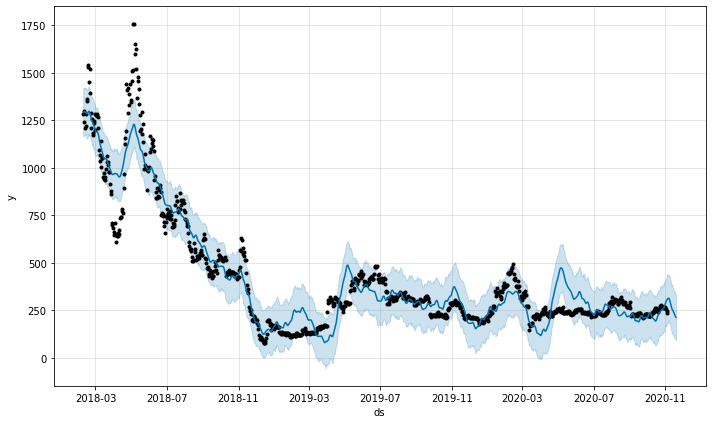

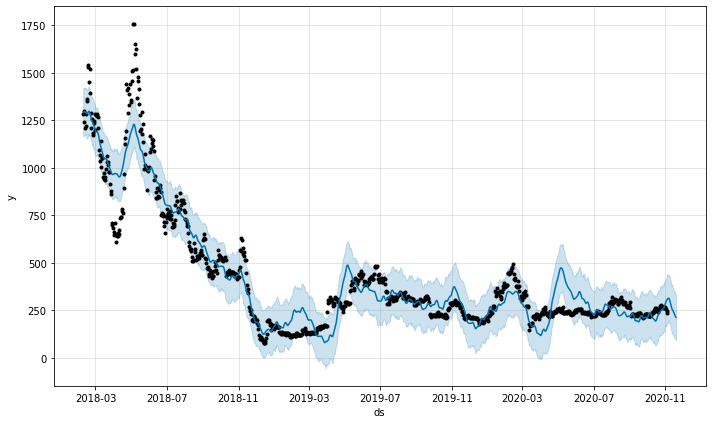

In [17]:
m.plot(prediction)

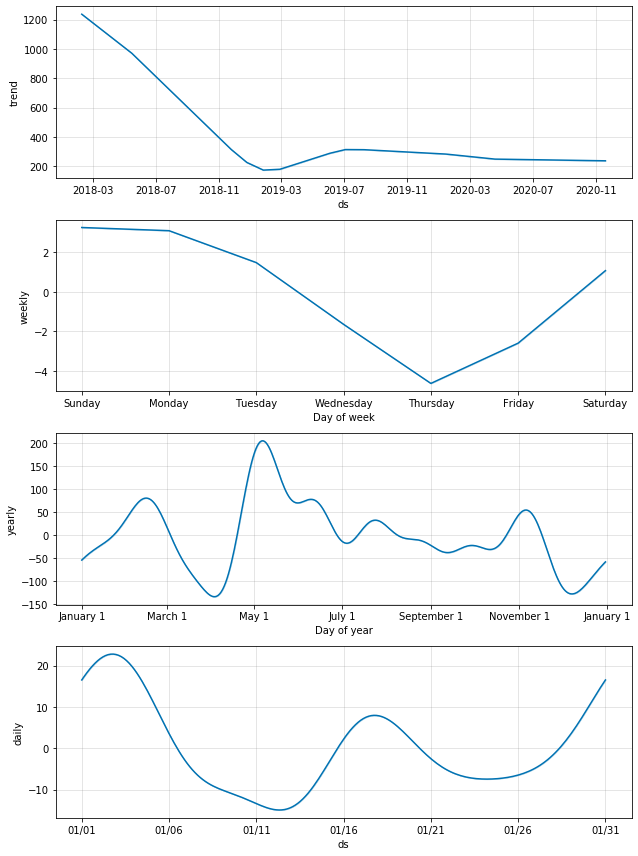

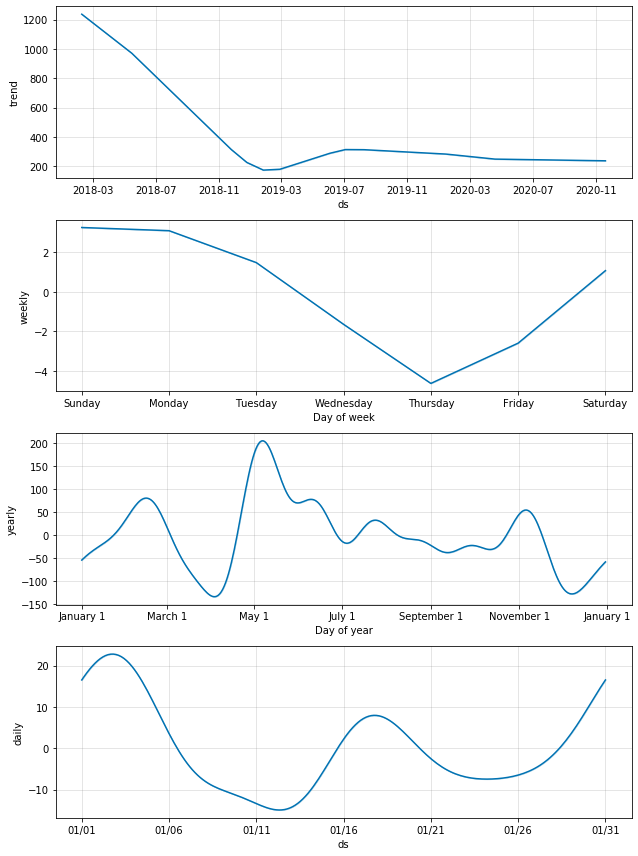

In [18]:
m.plot_components(prediction)

In [19]:
test

,time,close
801,2020-04-19,231.73
802,2020-04-20,219.24
803,2020-04-21,219.65
804,2020-04-22,233.19
805,2020-04-23,237.53
...,...,...
996,2020-10-31,262.26
997,2020-11-01,267.96
998,2020-11-02,257.44
999,2020-11-03,244.29


In [20]:
test=test.set_index("time")

In [21]:
test=test["close"]

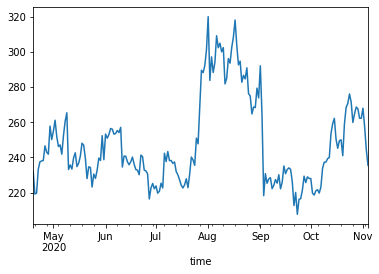

In [22]:
test.plot()

In [23]:
# find point/date for change

from fbprophet.plot import add_changepoints_to_plot

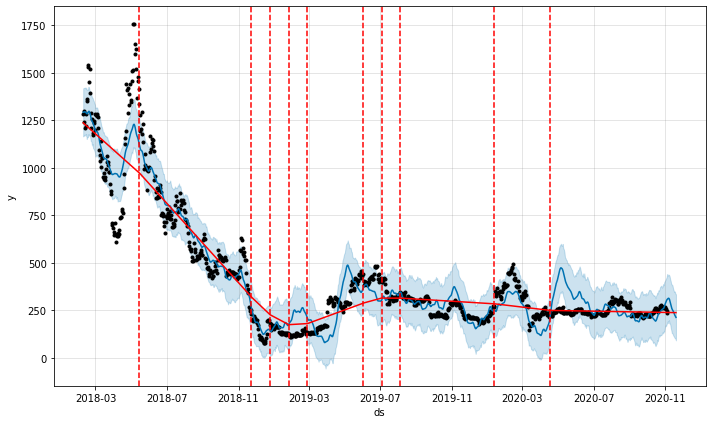

In [24]:
fig =m.plot(prediction)
c= add_changepoints_to_plot(fig.gca(),m,prediction)